In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

#### The formula for calculating adoption rate is: Adoption rate = number of new users / total number of users. 
#### For example, if you have a total of 1,000 users, of which 250 are new, then your adoption rate is 25% (250/1,000)
#### For a fixed time frame ,we need to find out how much a module(groups,google analytics) has been adopted by customers .


Simple data showing market penetration for each add-on

How many use each module

Which hubs use the module (ideally also showing the hub URL and University name)

The percentage of the total customer base that number represents

then we will have a meaningful way of comparing adoption of each module (e.g. Advising has reached 10% adoption, Groups is at 46%, etc.)…

…and have the ability to set goals around moving each module forward (e.g. this quarter we’d like to move Advising from 10% to 12%)

In [100]:
df1= pd.read_excel("[Template] Who's enabled what.xlsx",sheet_name=0)
df1.head()

,enabledmodule,count,%age of total admins (clients) provisioned,array_agg
0,Programs,588.0,[this is percentage of total admins who have t...,"{""Thiel Connect"",""CSU Dominguez Hills Connect""..."
1,Groups,NaN,NaN,NaN
2,Virtual Events (powered by Brazen),431.0,0.15,"{""Thiel Connect"",""HWS Connect"",""Dragon Network..."
3,Surveys,605.0,NaN,"{""Thiel Connect"",""CSU Dominguez Hills Connect""..."
4,Membership Management,28.0,NaN,"{Deprecate,""Torrey Connect"",Deprecate,""Career ..."


In [287]:
def return_original_hubs(row):
    row['hubsname']=row['hubs'].replace('\{','',regex=True).replace('\}','',regex=True).replace('\"','',regex=True)
        


    list_of_test_hubs = ['TFA QA','Caitlin Connect','PG SAM Training','PG UCN Training','Multi Hub1 Connect','Multi Hub2 Connect',
                     'Multi Hub3 Connect','Antonia Connect','Kelly Connect',
                     'Melissa Connect','Copyable Program Only','SAM Copyable Hub','UCN Copyable Hub',
                     'PEP Copyable Hub','UCN + Program Copyable Hub','Jon Connect','Vaishnavi','shraddhapg','siddhesh','k8s-prod-hub']

    hub_names = []
    for hub_name in row['hubsname']:
        if  'test' in str(hub_name).lower() or 'demo' in str(hub_name).lower() or hub_name in list_of_test_hubs :
            hub_names.append(hub_name)
    row = row[~(row['hubsname'].isin(hub_names))]
    return row
           


In [288]:
import json
list_of_unique_hubs = []
for i in range(len(df1.array_agg.dropna().values)):
    for j in df1.array_agg.dropna().values[i].split(','):
        list_of_unique_hubs.append(j)
        
len(list_of_unique_hubs)

4446

In [289]:
len(hubs_count.keys())

618

In [290]:
hubs_count['{"Thiel Connect"']

6

In [291]:
hubs_count={}
for i in list_of_unique_hubs:
    hubs_count[i] = list_of_unique_hubs.count(i)
hb = pd.DataFrame(list(hubs_count.items()),index = np.arange(0,len(hubs_count.keys())),columns=['hubs','number_of_modules'])
hb = hb.sort_values(by='number_of_modules',ascending=False)
hb

,hubs,number_of_modules
292,"""Nitin Test""",19
435,"""Torero Employer and Alumni Mentors (T.E.A.M.)""",16
55,"""Enrollment Success""",16
21,Deprecate,15
290,Mortal,13
...,...,...
613,"{""Tar Heel Advising Network""",1
614,BroncoLink},1
615,"{""demo Qualcomm Connect - DEMO""}",1
616,"{""Support Team Connect""",1


In [292]:
hb =return_original_hubs(hb)
hb

,hubs,number_of_modules,hubsname
435,"""Torero Employer and Alumni Mentors (T.E.A.M.)""",16,Torero Employer and Alumni Mentors (T.E.A.M.)
55,"""Enrollment Success""",16,Enrollment Success
21,Deprecate,15,Deprecate
290,Mortal,13,Mortal
177,Severny,13,Severny
...,...,...,...
611,"""Alumni Helping Alumni""}",1,Alumni Helping Alumni
612,"""Academic Success""}",1,Academic Success
613,"{""Tar Heel Advising Network""",1,Tar Heel Advising Network
614,BroncoLink},1,BroncoLink


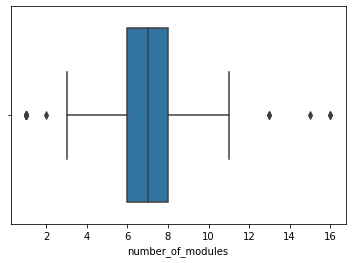

In [313]:
sns.boxplot(hb['number_of_modules'])
plt.show()

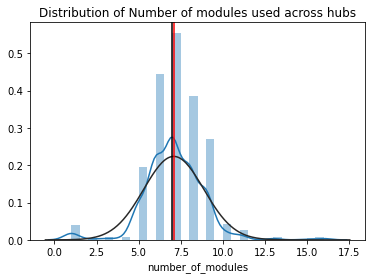

In [311]:
from scipy.stats import norm
sns.distplot(hb['number_of_modules'],fit=norm)
plt.axvline(hb['number_of_modules'].mean(),color='red')
plt.axvline(hb['number_of_modules'].median(),color='black')
plt.title('Distribution of Number of modules used across hubs')
plt.show()

<Figure size 1440x1440 with 0 Axes>

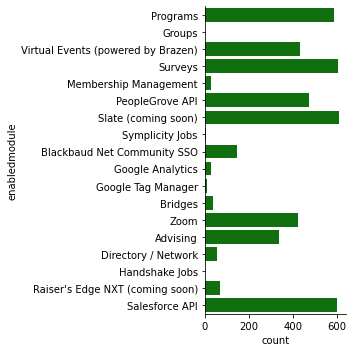

In [314]:
plt.figure(figsize=(20,20))
sns.catplot(
    data=df1,
    y='enabledmodule',
    x='count',
    kind='bar',
    color='green')
plt.show()

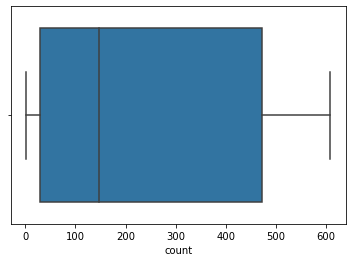

In [319]:
sns.boxplot(df1['count'].dropna())
plt.show()

In [330]:
df1['count'].median()

146.0

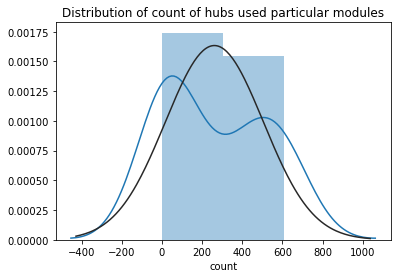

In [332]:
from scipy.stats import norm
sns.distplot(df1['count'],fit=norm)
plt.title('Distribution of count of hubs used particular modules')
plt.show()

In [272]:
df2= pd.read_excel("[Template] Who's enabled what.xlsx",sheet_name=1)
df2.head(3)

,cluster_id,hub_id,cluster-hub-id,cluster_hub_id,name,ActiveCustomer,Unnamed: 6,Programs,Groups,Virtual Events (powered by Brazen),Surveys,Membership Management,PeopleGrove API,Slate (coming soon),Symplicity Jobs,Blackbaud Net Community SSO,Google Analytics,Google Tag Manager,Bridges,Zoom,Advising,Directory / Network,Handshake Jobs,Raiser's Edge NXT (coming soon),Salesforce API
0,391.0,477.0,391-477,391_477,The Pride,opt-in,Programs,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,39.0,39.0,39-39,39_39,UMGC CareerQuest,opt-out,Groups,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,92.0,92.0,92-92,92_92,IrishCompass,opt-out,Virtual Events (powered by Brazen),1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [103]:
for i in range(df2.shape[0]):
    if np.sum(df2.loc[i,'Programs':])==18 :
        print([df2.loc[i,'hub_id'] , df2.loc[i,'name'] , np.sum(df2.loc[i,'Programs':])] )

[39.0, 'UMGC CareerQuest', 18.0]
[92.0, 'IrishCompass', 18.0]
[88.0, 'Westridge Connect', 18.0]


In [104]:
df3= pd.read_excel("[Template] Who's enabled what.xlsx",sheet_name=2)
df3.head()

,app,createdat,hubid,hubsname,clusterid,clustername
0,salesforce,2020-01-03T12:57:28.000+00:00,581.0,Business Knights Network,NaN,NaN
1,handshake,2020-01-04T15:50:11.000+00:00,271.0,Career & Alumni Success,NaN,NaN
2,zoom-webinars,2020-03-24T04:59:52.000+00:00,806.0,Ankita's Test Hub,NaN,NaN
3,handshake,2020-06-15T15:03:25.000+00:00,456.0,Bobcat Network,NaN,NaN
4,symplicity,2020-01-06T08:34:10.000+00:00,688.0,Ashford Connect,NaN,NaN


In [108]:
df_original.hubsname.value_counts()

Career & Alumni Success                                                             5
Support Team Connect                                                                4
School Connect                                                                      3
Ultimate Mentorship Platform's                                                      3
Pitt Commons                                                                        2
                                                                                   ..
Inspiring Futures Mentor Program through the JCB Hope Initiative at FIU Business    1
WillistonConnects                                                                   1
UCR Career Network                                                                  1
Michigan Public Health Connect                                                      1
DCIConnect                                                                          1
Name: hubsname, Length: 96, dtype: int64

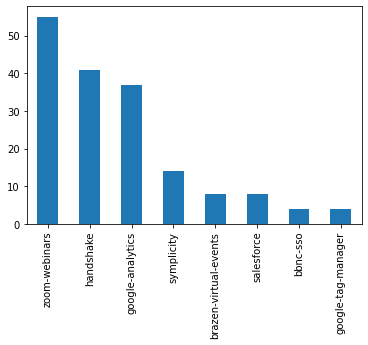

In [110]:
df_original.app.value_counts().plot.bar()

In [333]:
pd.set_option('display.max_rows',200)

In [334]:
a = df_original.groupby(['hubsname','app']).agg({'app':'count'}).head(126)
a

app
hubsname                                           app                       
APF Mentorship Initiative                          zoom-webinars            1
Ashford Connect                                    symplicity               1
Automation Hub                                     zoom-webinars            1
BC Connect                                         handshake                1
                                                   zoom-webinars            1
BYU Connect                                        handshake                1
                                                   salesforce               1
BYUH Ohana Network                                 handshake                1
                                                   zoom-webinars            1
BYUI Connect                                       handshake                1
Bobcat Network                                     handshake                1
Bothell Husky Landing                              handshake                1
                                                   zoom-webinars            1
Bronco Exchange                                    brazen-virtual-events    1
Buffalo State Success                              zoom-webinars            1
Business Knights Network                           salesforce               1
Cajun Compass                                      handshake                1
Cal State LA Alumni Mentoring Program              zoom-webinars            1
Capella Connect                                    zoom-webinars            1
Cardinal Connections                               handshake                1
Career & Alumni Success                            brazen-virtual-events    1
                                                   handshake                1
                                                   salesforce               1
                                                   symplicity               1
                                                   zoom-webinars            1
ClarkCONNECT                                       handshake                1
CoAD Connexion                                     zoom-webinars            1
College Fund Connect                               zoom-webinars            1
Connect UMass                                      zoom-webinars            1
DCIConnect                                         zoom-webinars            1
Dragon Network                                     handshake                1
Dworak-Peck Connect                                zoom-webinars            1
ED Centro                                          salesforce               1
EE Connect                                         zoom-webinars            1
Emerge                                             handshake                1
Enrollment Success                                 salesforce               1
                                                   zoom-webinars            1
EphLink                                            handshake                1
Fung Institute Connect                             handshake                1
                                                   zoom-webinars            1
GSPP Alumni Network                                symplicity               1
Gator Connect Hub                                  zoom-webinars            1
GeorgeConnX                                        handshake                1
Global Connect                                     handshake                1
Gwynedd Force                                      zoom-webinars            1
Highlander Nation                                  handshake                1
Honors Carolina                                    zoom-webinars            1
Honors Carolina Ambassador Network                 zoom-webinars            1
Hoya Gateway                                       zoom-webinars            1
Innovators                                         zoom-webinars            1
Inspiring Futures 

In [341]:
count = df_original.groupby(['hubsname']).agg({'app':'count'}).reset_index()#.sort_values(by='app',ascending=False)

In [339]:
count

,hubsname,app
0,APF Mentorship Initiative,1
1,Ashford Connect,1
2,Automation Hub,1
3,BC Connect,2
4,BYU Connect,2
5,BYUH Ohana Network,2
6,BYUI Connect,1
7,Bobcat Network,1
8,Bothell Husky Landing,2
9,Bronco Exchange,1
